 Q1. Problem Statement: Principal Component Analysis (PCA)Load the "vehicle.csv"dataset into a DataFrame and perform the following tasks:

 2.Considering the "class"column as the target variable/column, separate the target and the feature vectors

 3.Scale the numeric data in the independent variables (Feature vectors) using the Standard scalar

 4.Convert  the  independent  variables  into   2-D  data  using  PCA   (Principal Component Analysis)

 5.Combine the target data with the 2-D independent data/feature vectors to create final DataFrame

 6.Plot the final DataFrame using a scatter plot

 7.Calculate the variance ratio of the 2-D data converted using PCA


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv('vehicle.csv')
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


1.Find   out   the   null   values   in   the   DataFrame   and   drop   them   using dropna()  function

In [ ]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

2.Considering the "class"column as the target variable/column, separate the target and the feature vectors

In [ ]:
features=df[['scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']]
features.head()

,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,184.0,70.0,6.0,16.0,187.0,197
1,158.0,72.0,9.0,14.0,189.0,199
2,220.0,73.0,14.0,9.0,188.0,196
3,127.0,63.0,6.0,10.0,199.0,207
4,188.0,127.0,9.0,11.0,180.0,183


In [ ]:
target=df['class']
target.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

3.Scale the numeric data in the independent variables (Feature vectors) using the Standard scalar

In [ ]:
x=df.iloc[:,:-1].values
y=df['class'].values

In [ ]:
ss = StandardScaler().fit_transform(x)
ss

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

4.Convert  the  independent  variables  into   2-D  data  using  PCA   (Principal Component Analysis)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-55.671834,12.345821
1,-115.331883,-9.704408
2,213.150742,7.118451
3,-139.616617,19.753569
4,-96.743351,53.427448


5.Combine the target data with the 2-D independent data/feature vectors to create final DataFrame

In [ ]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class
0,-55.671834,12.345821,van
1,-115.331883,-9.704408,van
2,213.150742,7.118451,car
3,-139.616617,19.753569,van
4,-96.743351,53.427448,bus


6.Plot the final DataFrame using a scatter plot

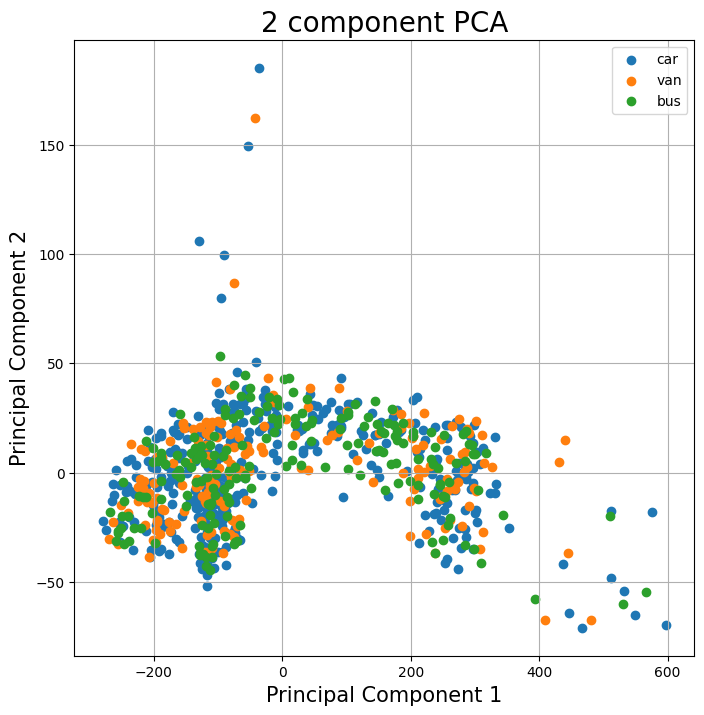

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['car', 'van', 'bus']
colors = ['b', 'r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2'])
ax.legend(targets)
ax.grid()

7.Calculate the variance ratio of the 2-D data converted using PCA

In [ ]:
pca.explained_variance_ratio_

array([0.95860865, 0.01804379])